In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.utils import plot_model


2025-04-26 21:26:58.778300: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-26 21:26:58.779027: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-26 21:26:58.781537: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-26 21:26:58.789640: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745683018.803470   19624 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745683018.81

In [4]:
# Read the data
df = pd.read_csv('../../data/healthyfime_tfkeras.csv')
df.head()


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [5]:
# Replace "M" with 0 and "F" with 1
df.replace({"M":0, "F":1}, inplace=True)

# Map 'class' to numeric values
classes = list(df['class'].unique())
mapping_dict = {ch: i for i, ch in enumerate(sorted(classes, reverse=True))}
df['class'].replace(mapping_dict, inplace=True)

df.head()


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,1
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,3
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,1
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,2
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,2


In [6]:
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)


In [7]:
# Define a Sequential model
def create_sequential_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(11,), name="Hidden_Layer_1"),
        Dense(4, activation='softmax', name="Output_Layer")
    ])
    model.compile(loss="sparse_categorical_crossentropy", 
                  optimizer=tf.keras.optimizers.Adam(0.01), 
                  metrics=["accuracy"])
    return model


In [8]:
# Create and train the Sequential model
model_seq = create_sequential_model()

history = model_seq.fit(
    X_train, y_train,
    epochs=100,
    validation_split=0.1,
    verbose=1,
    batch_size=256
)


Epoch 1/100


2025-04-26 21:27:00.202427: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4828 - loss: 1.1174 - val_accuracy: 0.6161 - val_loss: 0.8466
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6216 - loss: 0.8547 - val_accuracy: 0.6244 - val_loss: 0.8098
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6548 - loss: 0.8034 - val_accuracy: 0.6609 - val_loss: 0.7701
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6757 - loss: 0.7579 - val_accuracy: 0.6891 - val_loss: 0.7382
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7093 - loss: 0.7147 - val_accuracy: 0.6915 - val_loss: 0.7252
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7155 - loss: 0.7022 - val_accuracy: 0.7056 - val_loss: 0.7080
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7242 - loss: 0.6743 - val_accuracy: 0.7065 - val_loss: 0.6962
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7276 - loss: 0.6738 - val_accuracy: 0.7231 - val_loss: 0.6

In [9]:
model_seq.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)          │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,086 (12.06 KB)

 Trainable params: 1,028 (4.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,058 (8.04 KB)

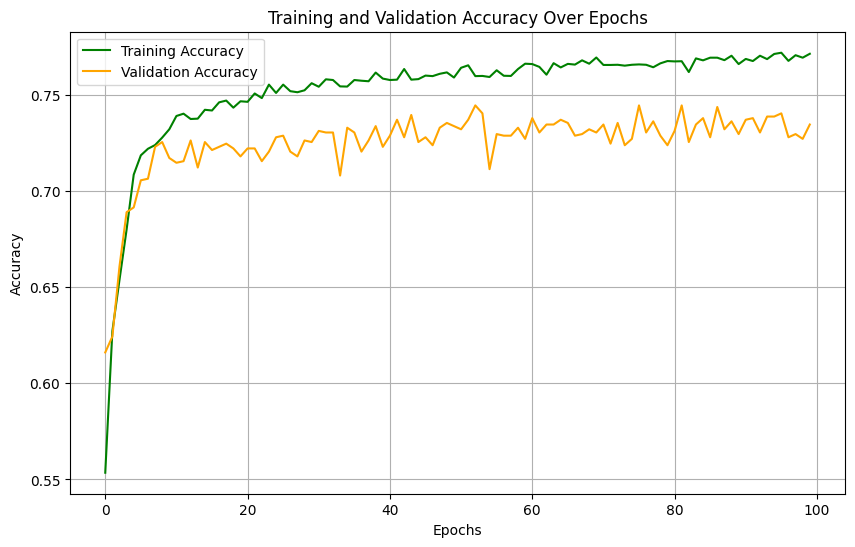

In [10]:
# Extract accuracy and validation accuracy values
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Training Accuracy', color='green')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Define a Functional API model
def create_functional_model():
    inputs = Input(shape=(11, 1))
    x = Flatten()(inputs) 
    h1 = Dense(16, activation='relu', name='hidden_1')(inputs)
    h2 = Dense(8, activation='relu', name='hidden_2')(h1)
    h3 = Dense(4, activation='relu', name='hidden_3')(h2)
    out1 = Dense(2, activation='sigmoid', name='output_1')(h3)
    out2 = Dense(1, activation='relu', name='output_2')(h3)

    model = Model(inputs=inputs, outputs=[out1, out2], name="Functional_Model")
    return model


In [12]:
model_func = create_functional_model()
model_func.summary()

Model: "Functional_Model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 11, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden_1 (Dense)    │ (None, 11, 16)    │         32 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden_2 (Dense)    │ (None, 11, 8)     │        136 │ hidden_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden_3 (Dense)    │ (None, 11, 4)     │         36 │ hidden_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_1 (Dense)    │ (None, 11, 2)     │         10 │ hidden_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_2 (Dense)    │ (None, 11, 1)     │          5 │ hidden_3[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 219 (876.00 B)

 Trainable params: 219 (876.00 B)

 Non-trainable params: 0 (0.00 B)